# Prediciton (Classification) the Types of Trees.

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines.

---
---

### What I Plan to :

   - Try to understand the dataset using `Pandas` module and deal with imbalanced dataset problem.
   - Implement data cleaning, handling with outliers and missing values using `Pandas`, `NumPy` and other required modules.
   - Implement Feature Engineering process using ``SQLite`` local database.
   - Build ML models
   - Evaluate success of ML models with appropriate performance metrics and visualize them using `Yellowbrick`, `Seaborn` or `Matplotlib` modules.
   - Compare models

---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from IPython.core.pylabtools import figsize
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [2]:
tree = pd.read_csv("covtype.csv")
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
tree.shape

(581012, 55)

### Deal with imbalanced data problem

In [4]:
tree.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [5]:
tree = tree.head(50000)

In [6]:
tree.Cover_Type.value_counts()

2    28793
1    10151
5     2416
7     2160
6     2160
4     2160
3     2160
Name: Cover_Type, dtype: int64

###  Explore Data

In [7]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 55 columns):
Elevation                             50000 non-null int64
Aspect                                50000 non-null int64
Slope                                 50000 non-null int64
Horizontal_Distance_To_Hydrology      50000 non-null int64
Vertical_Distance_To_Hydrology        50000 non-null int64
Horizontal_Distance_To_Roadways       50000 non-null int64
Hillshade_9am                         50000 non-null int64
Hillshade_Noon                        50000 non-null int64
Hillshade_3pm                         50000 non-null int64
Horizontal_Distance_To_Fire_Points    50000 non-null int64
Wilderness_Area1                      50000 non-null int64
Wilderness_Area2                      50000 non-null int64
Wilderness_Area3                      50000 non-null int64
Wilderness_Area4                      50000 non-null int64
Soil_Type1                            50000 non-null int64
Soil_T

In [8]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2834.42312,141.129540,13.13148,241.799760,40.116900,3267.410960,216.565780,223.471600,138.079620,3548.247420,...,0.013800,0.012320,0.000440,0.002040,0.000200,0.000680,0.015920,0.013140,0.011000,2.460340
std,282.20244,106.323404,7.46299,206.188183,50.069256,1967.361071,24.356933,18.552982,35.178982,1929.301441,...,0.116661,0.110311,0.020972,0.045121,0.014141,0.026068,0.125167,0.113875,0.104303,1.553459
min,1863.00000,0.000000,0.00000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2679.00000,55.000000,8.00000,85.000000,6.000000,1410.000000,206.000000,215.000000,119.000000,1819.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2857.00000,112.000000,12.00000,190.000000,25.000000,3137.000000,222.000000,226.000000,140.000000,3598.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3021.00000,207.000000,17.00000,350.000000,59.000000,5079.250000,233.000000,236.000000,159.000000,5284.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.00000,360.000000,61.00000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
for col in tree.columns:
    print("Column", col, "has", tree[col].nunique(), "unique values")

Column Elevation has 1665 unique values
Column Aspect has 361 unique values
Column Slope has 60 unique values
Column Horizontal_Distance_To_Hydrology has 430 unique values
Column Vertical_Distance_To_Hydrology has 440 unique values
Column Horizontal_Distance_To_Roadways has 5781 unique values
Column Hillshade_9am has 176 unique values
Column Hillshade_Noon has 143 unique values
Column Hillshade_3pm has 247 unique values
Column Horizontal_Distance_To_Fire_Points has 5813 unique values
Column Wilderness_Area1 has 2 unique values
Column Wilderness_Area2 has 2 unique values
Column Wilderness_Area3 has 2 unique values
Column Wilderness_Area4 has 2 unique values
Column Soil_Type1 has 2 unique values
Column Soil_Type2 has 2 unique values
Column Soil_Type3 has 2 unique values
Column Soil_Type4 has 2 unique values
Column Soil_Type5 has 2 unique values
Column Soil_Type6 has 2 unique values
Column Soil_Type7 has 1 unique values
Column Soil_Type8 has 2 unique values
Column Soil_Type9 has 2 unique 

>### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
# There are no missing values.

tree.isnull().sum()*100/tree.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

#### *ii. Outlier Detection*

- Firstly, I will choose the columns which have unique values more than 7.
- Second, I will define a function to help me understand the outliers and how I can handle with them.
- Lastly, I will handle outliers.

In [11]:
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


## Deal with Outliers

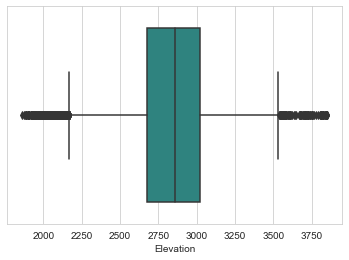

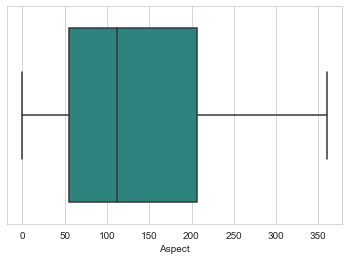

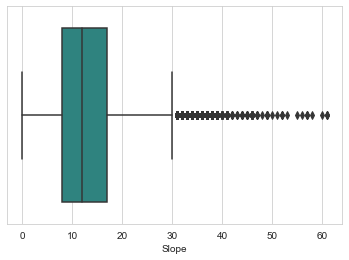

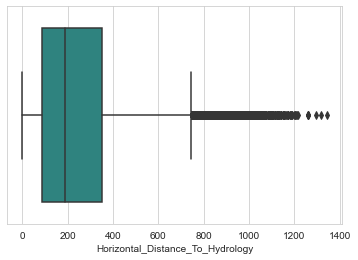

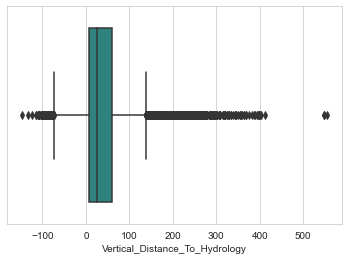

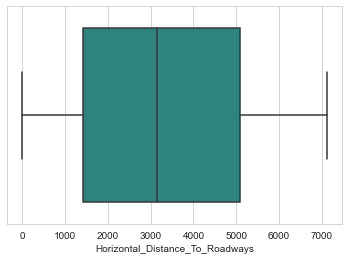

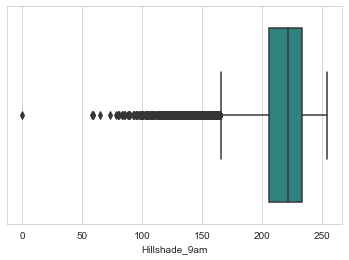

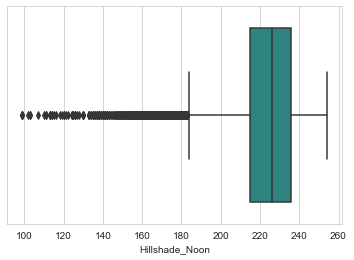

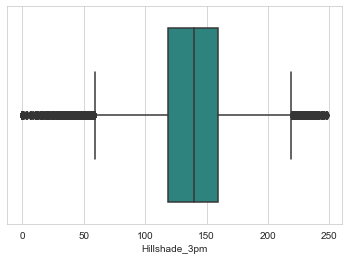

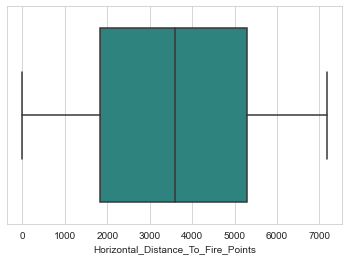

In [12]:
for i, col in enumerate(numeric):
    plt.figure(i, figsize=(6,4))
    sns.boxplot(x=col, data=tree, palette="viridis")

In [13]:
def detect_outliers(df, col_name):
    
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

#### Let's see how many outliers are there of each continuous columns.

In [14]:
for col in numeric:
    if detect_outliers(tree, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(tree, col)[2], col))

There are 1314 outliers in Elevation
There are 1457 outliers in Slope
There are 1444 outliers in Horizontal_Distance_To_Hydrology
There are 2999 outliers in Vertical_Distance_To_Hydrology
There are 2330 outliers in Hillshade_9am
There are 1939 outliers in Hillshade_Noon
There are 1750 outliers in Hillshade_3pm


- I'll limit all rows which contain outliers in these seven colums above with lower and upper limit.

In [15]:
for i in numeric:
    tree.loc[tree[i] < detect_outliers(tree, i)[0]][i] = detect_outliers(tree, i)[0]
    tree.loc[tree[i] > detect_outliers(tree, i)[1]][i] = detect_outliers(tree, i)[1]

In [16]:
tree1 = tree.reset_index(drop=True)

**I want to explore the sum of columns of each binary type.**

In [18]:
binaries1 = tree1.loc[:, 'Wilderness_Area1':'Wilderness_Area4']

In [19]:
binaries2 = tree1.loc[:, 'Soil_Type1':'Soil_Type40']

In [20]:
counter = 0
for col in binaries1:
    count = tree1.loc[:,col].sum()
    counter +=count
    print(col, count)
print("\nsum of cols:", counter)

Wilderness_Area1 38477
Wilderness_Area2 499
Wilderness_Area3 6349
Wilderness_Area4 4675

sum of cols: 50000


In [21]:
counter = 0
for col in binaries2:
    count = tree1.loc[:,col].sum()
    counter +=count
    print(col, count)   
print("\nsum of cols:", counter)

Soil_Type1 355
Soil_Type2 623
Soil_Type3 962
Soil_Type4 843
Soil_Type5 165
Soil_Type6 650
Soil_Type7 0
Soil_Type8 1
Soil_Type9 10
Soil_Type10 2142
Soil_Type11 406
Soil_Type12 8222
Soil_Type13 476
Soil_Type14 169
Soil_Type15 0
Soil_Type16 1097
Soil_Type17 612
Soil_Type18 1812
Soil_Type19 191
Soil_Type20 2365
Soil_Type21 16
Soil_Type22 345
Soil_Type23 1906
Soil_Type24 1762
Soil_Type25 1
Soil_Type26 54
Soil_Type27 15
Soil_Type28 9
Soil_Type29 17304
Soil_Type30 3678
Soil_Type31 332
Soil_Type32 690
Soil_Type33 616
Soil_Type34 22
Soil_Type35 102
Soil_Type36 10
Soil_Type37 34
Soil_Type38 796
Soil_Type39 657
Soil_Type40 550

sum of cols: 50000


>### Summary results :
>- The analysis above prove that ``Wilderness_Areas`` and ``Soil_Types`` columns have only ``1`` or ``0`` and it belongs to only one ``Soil_Type`` or ``Wilderness_Area`` at the same time.
>- These columns are ``get_dummied`` (one-hot encoded) from categorical values.

#### Target column is `Cover_Type`. So let's take a closer look at this column.

In [22]:
for i in range(1,8) :
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)

the shape of the value of 1 (10151, 55)
the shape of the value of 2 (28793, 55)
the shape of the value of 3 (2160, 55)
the shape of the value of 4 (2160, 55)
the shape of the value of 5 (2416, 55)
the shape of the value of 6 (2160, 55)
the shape of the value of 7 (2160, 55)


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

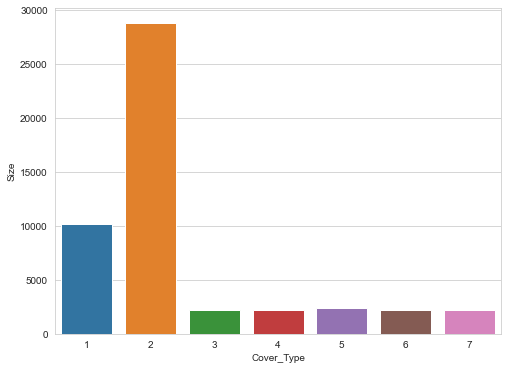

In [23]:
class_tree = tree1.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

- Additionally I would like to check the distribution of each class of ``Cover_Type`` in terms of percentages.

In [24]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Cover_Type', class_tree.index[i])
    print('%.2f'% percent)

Cover_Type 1
0.20
Cover_Type 2
0.58
Cover_Type 3
0.04
Cover_Type 4
0.04
Cover_Type 5
0.05
Cover_Type 6
0.04
Cover_Type 7
0.04


#### Now, let's take a closer look at correlation of continuous columns.

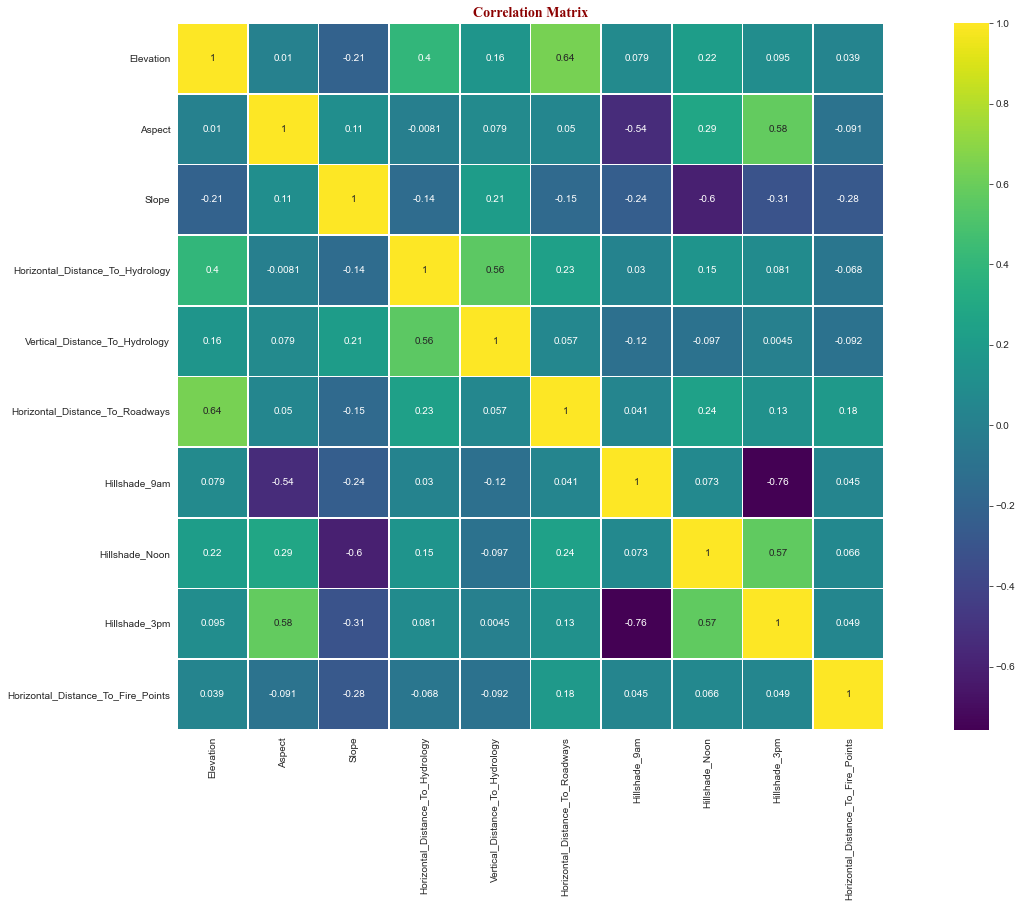

In [25]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

>### Summary results :
>- ``Hillshade_3pm`` are correlated to ``Hillshade_9am``, ``Aspect`` and ``Hillshade_Noon`` . So I decided to drop ``Hillshade_3pm``.
>- ``Hillshade_Noon`` are correlated to ``Slope``. So I decided to drop ``Hillshade_Noon``.

***
***

## 3. Feature Engineering with *sqlite3* Library

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of `Horizantal Distances to Hydrology and Roadways`.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Lastly, I will drop unnecessary columns ``'Hillshade_3pm', Hillshade_Noon``) that I conclued previously.

In [27]:
import sqlite3

- Creation a ``sqlite`` database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)

In [28]:
with sqlite3.connect("tree_database.db") as cnnct:
    tree1.to_sql("covtype2", cnnct, if_exists = "replace")

In [29]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, (Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype2;"""

In [30]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,Soil_Type7,Soil_Type8,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14,Soil_Type15,Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21,Soil_Type22, Soil_Type23, Soil_Type24,Soil_Type25, 
Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype2;"""

In [31]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [32]:
df2.to_csv("covtype2.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

### Import Libraries

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import f1_score

### Reading dataset with `pandas`

In [34]:
df = pd.read_csv("covtype2.csv")

In [35]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,6279,1,0,0,0,...,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,6225,1,0,0,0,...,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,6121,1,0,0,0,...,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,6211,1,0,0,0,...,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,6172,1,0,0,0,...,0,0,0,0,0,0,5,23410,272,1297


In [36]:
X = df.drop("Cover_Type", axis = 1)

In [37]:
y = df["Cover_Type"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### XGBoost Classifer

In [39]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = xgb_classifier.predict(X_test)

In [41]:
xgb_accuracy = accuracy_score(y_test, y_pred)

In [42]:
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_f1

0.9112724256231381

In [43]:
xgb_accuracy

0.9378

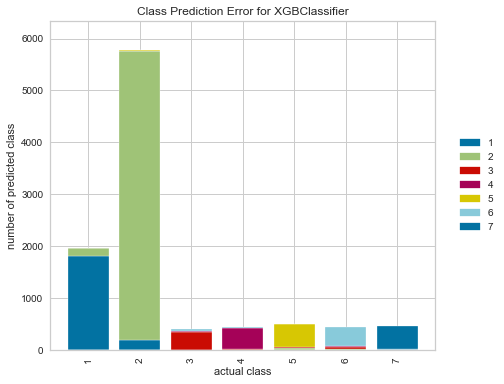

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [44]:
cpe = ClassPredictionError(xgb_classifier)

cpe.fit(X_train, y_train)
cpe.score(X_test, y_test)
cpe.show()

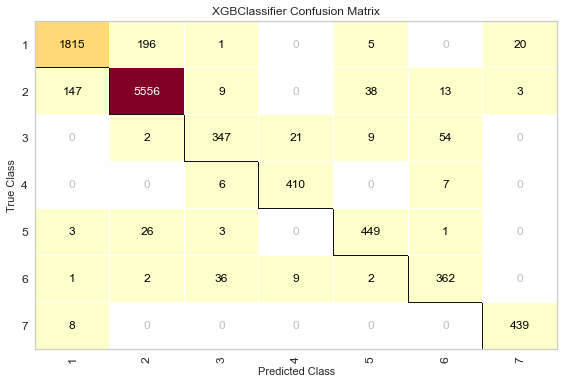

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
cm = ConfusionMatrix(xgb_classifier)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

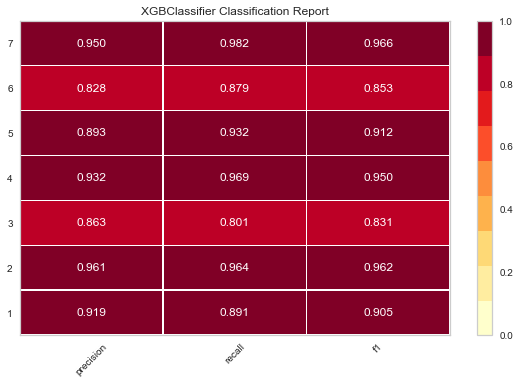

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [46]:
cr = ClassificationReport(xgb_classifier)

cr.fit(X_train, y_train)
cr.score(X_test, y_test) 
cr.show() 

### ``DecisionTreeClassifier``

In [47]:
modelTree = DecisionTreeClassifier()

In [48]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [49]:
y_pred = modelTree.predict(X_test)

In [50]:
tree_f1 = f1_score(y_test, y_pred, average='macro')
tree_f1

0.8676903288157919

In [51]:
tree_accuracy = accuracy_score(y_test, y_pred)

In [52]:
tree_accuracy

0.9172

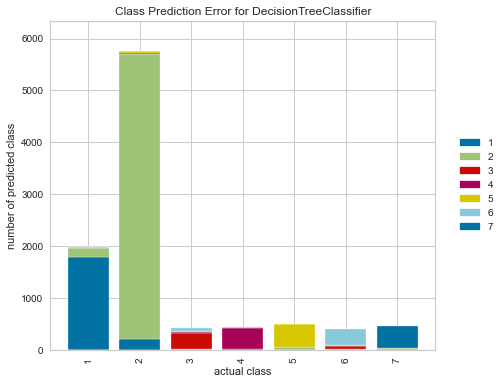

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [53]:
cpe = ClassPredictionError(modelTree)

cpe.fit(X_train, y_train)
cpe.score(X_test, y_test)
cpe.show()

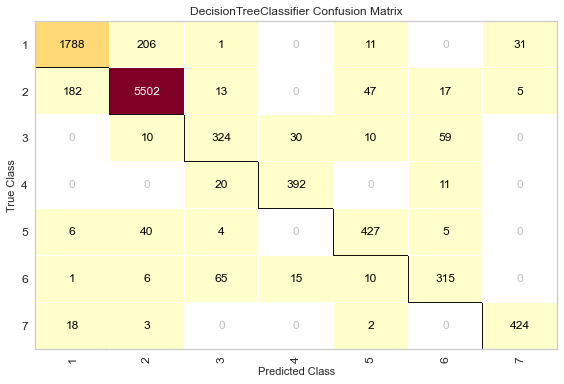

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
cm = ConfusionMatrix(modelTree)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

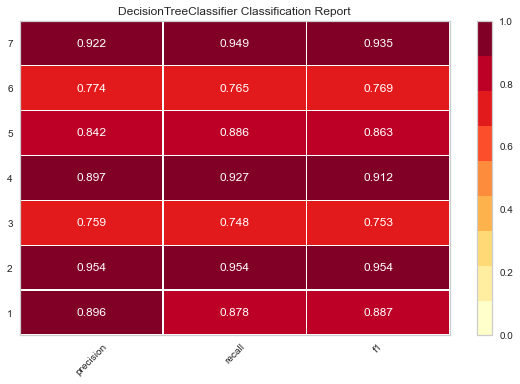

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [55]:
visualizer = ClassificationReport(modelTree)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rfc.predict(X_test)

In [58]:
rfc_f1 = f1_score(y_test, y_pred, average='macro')
rfc_f1

0.9227562593570312

In [59]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.9444

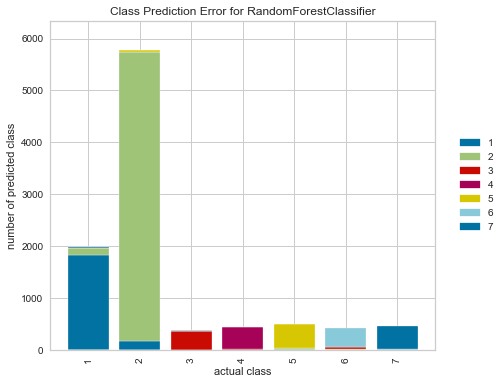

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [60]:
cpe = ClassPredictionError(rfc)

cpe.fit(X_train, y_train)
cpe.score(X_test, y_test)
cpe.show()

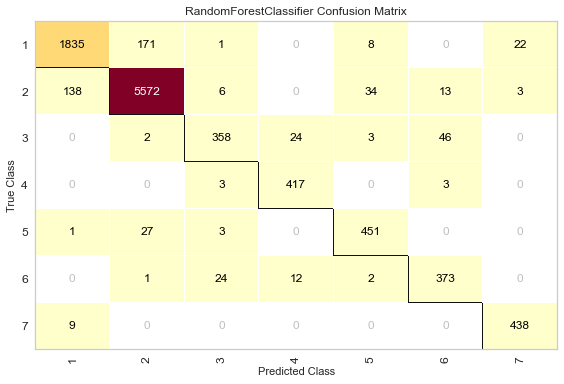

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
cm = ConfusionMatrix(rfc)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

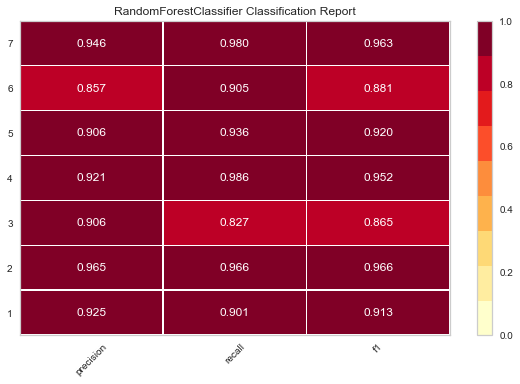

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [62]:
cr = ClassificationReport(rfc)

cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show() 

### KNeighborsClassifer

In [63]:
scale = StandardScaler()

In [64]:
X = scale.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [66]:
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn.predict(X_test)

In [69]:
knn_f1 = f1_score(y_test, y_pred, average='macro')
knn_f1

0.8482218270496926

In [70]:
knn_accuracy = accuracy_score(y_test, y_pred)

In [71]:
knn_accuracy

0.8971

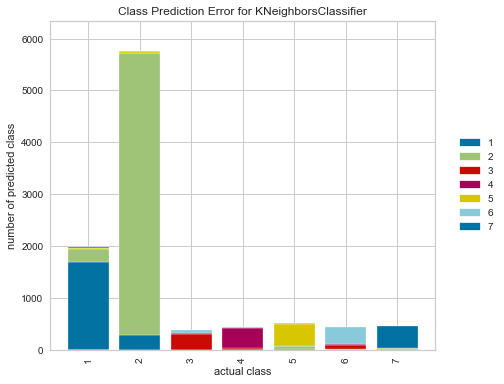

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [72]:
cpe = ClassPredictionError(knn)

cpe.fit(X_train, y_train)
cpe.score(X_test, y_test)
cpe.show()

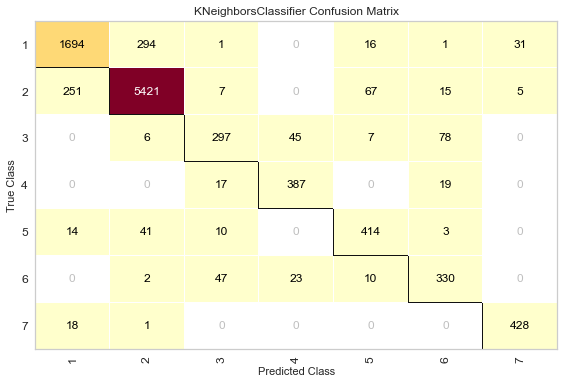

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [73]:
cm = ConfusionMatrix(knn)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

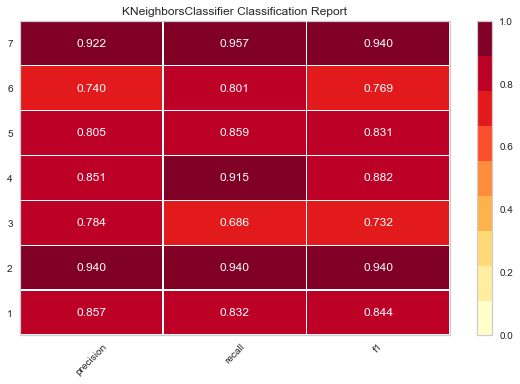

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [74]:
cr = ClassificationReport(knn)

cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show() 

## Compare The Models

### Accuracy Comparison

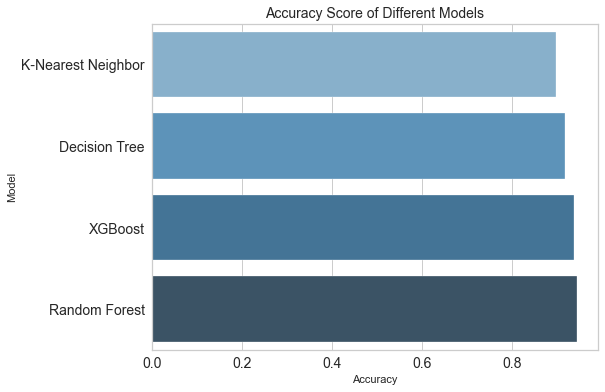

In [75]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy, tree_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14);

### F1 Score Comparison

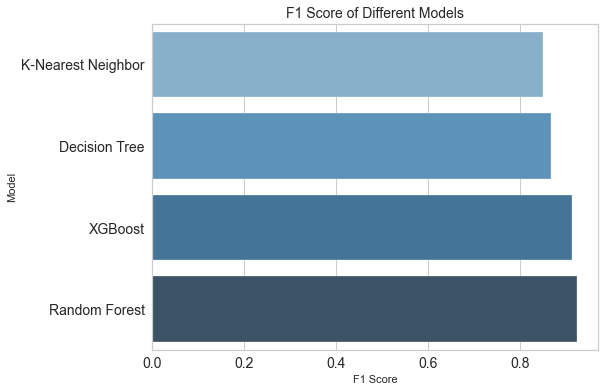

In [76]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [knn_f1, rfc_f1, xgb_f1, tree_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(8,6))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14);

- Best Regards..